In [1]:
import pandas as pd
import tiktoken
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
def num_tokens_from_string(string: str, encoding_name: str = "cl100k_base") -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [13]:
df = pd.read_parquet("data/speeches/speeches_sotu.parquet")

In [14]:
df["num_tokens"] = df["Transcript"].apply(lambda x: num_tokens_from_string(x))

In [15]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year

In [16]:
df

,Date,President,Transcript,num_tokens,Year
0,1988-01-25,Ronald Reagan,"Mr. Speaker, Mr. President, and distinguished ...",5802,1988
1,1990-01-31,George H. W. Bush,"Mr. President, Mr. Speaker, members of the Uni...",4558,1990
2,1991-01-29,George H. W. Bush,Mr. President and Mr. Speaker and members of t...,4681,1991
3,1992-01-28,George H. W. Bush,"Mr. Speaker and Mr. President, distinguished m...",6111,1992
4,1994-01-25,Bill Clinton,"Thank you very much. Mr. Speaker, Mr. Presiden...",8635,1994
5,1995-01-24,Bill Clinton,"Mr. President, Mr. Speaker, members of the 104...",10679,1995
6,1996-01-23,Bill Clinton,"Mr. Speaker, Mr. Vice President, members of th...",7313,1996
7,1997-02-04,Bill Clinton,"Mr. Speaker, Mr. Vice President, members of th...",7912,1997
8,1998-01-27,Bill Clinton,"Mr. Speaker, Mr. Vice President, members of th...",8680,1998
9,1999-01-19,Bill Clinton,"Mr. Speaker, Mr. Vice President, members of Co...",8911,1999


/tmp/ipykernel_7804/1009195968.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="num_tokens", palette="deep").set(


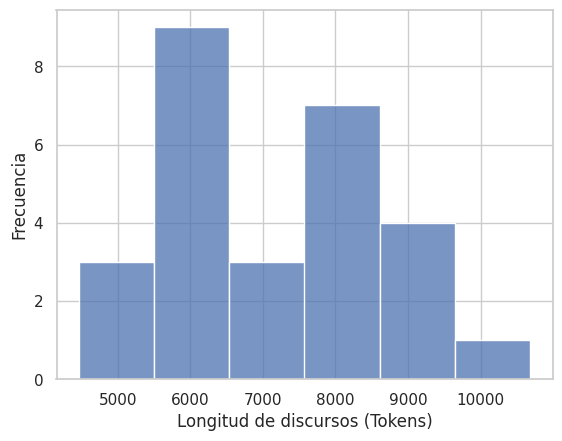

In [33]:
sns.set_theme(style="whitegrid", palette="deep")

sns.histplot(data=df, x="num_tokens", palette="deep").set(
    xlabel="Longitud de discursos (Tokens)", 
    ylabel="Frecuencia"
)
plt.savefig("distribucion_tokens_1.png")

In [21]:
df["num_tokens"].describe()

count       27.000000
mean      7134.333333
std       1526.582281
min       4467.000000
25%       6129.000000
50%       7135.000000
75%       8268.500000
max      10679.000000
Name: num_tokens, dtype: float64

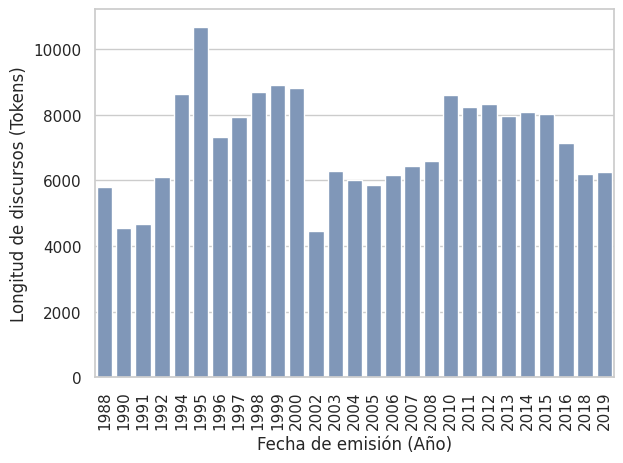

In [41]:
sns.set_theme(style="whitegrid", palette="deep")
ax = sns.barplot(data=df, y="num_tokens", x="Year", color="#7795c1")
ax.set(
    ylabel="Longitud de discursos (Tokens)", 
    xlabel="Fecha de emisión (Año)"
)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("distribucion_tokens_2.png")

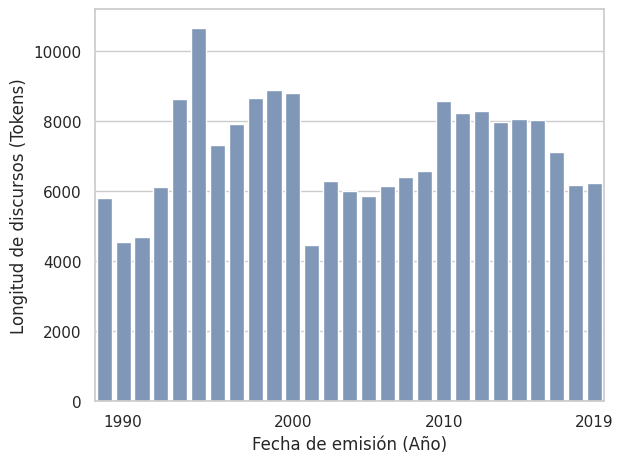

In [42]:
sns.set_theme(style="whitegrid", palette="deep")
ax = sns.barplot(data=df, y="num_tokens", x="Year", color="#7795c1")
ax.set(
    ylabel="Longitud de discursos (Tokens)", 
    xlabel="Fecha de emisión (Año)"
)
plt.xticks(ticks=["1990", "2000", "2010", "2019"])
plt.tight_layout()

plt.savefig("distribucion_tokens_3.png")